# EDA - Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations (Patil 2018).

## Goals

- **Data cleaning:** cleaning the database, outliers, missings;
- **Data Investigation:** describe the customer base and e-commerce segments;
- **Some questions to answer:**
- What is the average delivery time in all countries?
- Which customer segment is most profitable each year?
- What is the segment with the highest sales volume? (understand volume by number of sales)
- How are customers distributed across countries?
- Create a Customer Profile based on their purchasing frequency - calculate purchasing frequency for each customer
- Are the most frequent customers contributing more revenue?
- Are they also profitable?

### Import Librarys

In [1]:
# Data Analysis Step
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# plot parameters
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# outliers with mahalanobis
from scipy.spatial import distance



## Data Preparation

**Notes:**

- TARGET: 'Sales"
- Fatures: 'Sales', 'customer ID', 'segment', 'city', 'state', 'order date', 'ship date', 'profit'
- order and ship date are not in datetime format.

### Import DataSet

In [2]:
# dataset from the Excel file 
dataset = pd.read_excel('../data/dataset_time_series.xlsx')
df = dataset.copy()

### Understanding the data

In [3]:
def summary(df):
    """
    Display a summary of a DataFrame.

    This function displays the first few rows of the DataFrame, basic information about the DataFrame's structure,
    and summary statistics including percentiles.

    Parameters:
    df (DataFrame): The pandas DataFrame to be summarized.

    Returns:
    None
    """

    display(f'Rows: {df.shape[0]}; Columns: {df.shape[1]}')
    display(df.head())
    print('-' * 100)
    display(df.info())
    print('-' * 100)
    display(df.describe([0.01, 0.25, 0.50, 0.75, 0.99]))

In [4]:
summary(df)

'Rows: 51290; Columns: 23'

,Order ID,Order Date,Ship Date,Ship Mode,customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,ES-2011-5338028,28-12-2011,01-01-2012,Second Class,18115,Mick Hernandez,Home Office,Turin,Piedmont,Italy,...,FUR-BO-10003541,Furniture,Bookcases,"Bush Classic Bookcase, Metal",1236.420,3,0.0,420.3000,139.93,Medium
1,ID-2011-24160,29-12-2011,01-01-2012,Second Class,20170,Sarah Bern,Consumer,Gold Coast,Queensland,Australia,...,TEC-PH-10002601,Technology,Phones,"Motorola Smart Phone, Cordless",578.502,1,0.1,-38.5680,131.81,Critical
2,CA-2011-141313,28-12-2011,01-01-2012,Standard Class,10780,Anthony Jacobs,Corporate,Beverly,Massachusetts,United States,...,OFF-AP-10002651,Office Supplies,Appliances,Hoover Upright Vacuum With Dirt Cup,1737.180,6,0.0,503.7822,131.71,Medium
3,ID-2011-24160,29-12-2011,01-01-2012,Second Class,20170,Sarah Bern,Consumer,Gold Coast,Queensland,Australia,...,FUR-BO-10002308,Furniture,Bookcases,"Safco Floating Shelf Set, Metal",353.160,2,0.1,39.2400,92.20,Critical
4,CA-2011-104738,30-12-2011,01-01-2012,Second Class,20620,Stefania Perrino,Corporate,Laredo,Texas,United States,...,TEC-PH-10002468,Technology,Phones,"Plantronics CS 50-USB - headset - Convertible,...",217.584,2,0.2,19.0386,76.76,Critical


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   customer ID     51290 non-null  int64  
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    5129

None

----------------------------------------------------------------------------------------------------


,customer ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,14037.790310,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,5289.254612,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,15.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
1%,600.000000,2149.000000,3.690000,1.000000,0.000000,-351.505650,0.200000
25%,11050.000000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,14635.000000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,18265.000000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
99%,21790.000000,98115.000000,2301.000000,11.000000,0.700000,587.359950,286.754300
max,21925.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


### Selecting specific columns for analysis

In [5]:
df = df[['Order ID', 'Order Date', 'Ship Date', 'customer ID','Segment', 'City', 'State', 'Region', 'Country', 'Market', 'Product ID', 'Category', 'Product Name', 'Sales', 'Quantity','Profit']]

In [6]:
df.head()

,Order ID,Order Date,Ship Date,customer ID,Segment,City,State,Region,Country,Market,Product ID,Category,Product Name,Sales,Quantity,Profit
0,ES-2011-5338028,28-12-2011,01-01-2012,18115,Home Office,Turin,Piedmont,South,Italy,EU,FUR-BO-10003541,Furniture,"Bush Classic Bookcase, Metal",1236.420,3,420.3000
1,ID-2011-24160,29-12-2011,01-01-2012,20170,Consumer,Gold Coast,Queensland,Oceania,Australia,APAC,TEC-PH-10002601,Technology,"Motorola Smart Phone, Cordless",578.502,1,-38.5680
2,CA-2011-141313,28-12-2011,01-01-2012,10780,Corporate,Beverly,Massachusetts,East,United States,US,OFF-AP-10002651,Office Supplies,Hoover Upright Vacuum With Dirt Cup,1737.180,6,503.7822
3,ID-2011-24160,29-12-2011,01-01-2012,20170,Consumer,Gold Coast,Queensland,Oceania,Australia,APAC,FUR-BO-10002308,Furniture,"Safco Floating Shelf Set, Metal",353.160,2,39.2400
4,CA-2011-104738,30-12-2011,01-01-2012,20620,Corporate,Laredo,Texas,Central,United States,US,TEC-PH-10002468,Technology,"Plantronics CS 50-USB - headset - Convertible,...",217.584,2,19.0386


### Normalize Date

In [7]:
# function, verify if is date format
def is_date_format(df, column):
    data_type = df[column].dtype
    
    if data_type == 'datetime64[ns]':
        print(f"The '{column}' column is in date format.")
    else:
        print(f"The '{column}' column is not in date format.")

In [8]:
is_date_format(df, 'Order Date')

The 'Order Date' column is not in date format.


In [9]:
is_date_format(df, 'Ship Date')

The 'Ship Date' column is not in date format.


In [10]:
# convert to date format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', dayfirst=True)

is_date_format(df, 'Order Date')
df['Order Date']

The 'Order Date' column is in date format.


0       2011-12-28
1       2011-12-29
2       2011-12-28
3       2011-12-29
4       2011-12-30
           ...    
51285   2014-12-26
51286   2014-12-27
51287   2014-12-24
51288   2014-12-24
51289   2014-12-27
Name: Order Date, Length: 51290, dtype: datetime64[ns]

In [11]:
# convert to date format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', dayfirst=True)

is_date_format(df, 'Ship Date')
df['Ship Date']

The 'Ship Date' column is in date format.


0       2012-01-01
1       2012-01-01
2       2012-01-01
3       2012-01-01
4       2012-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Ship Date, Length: 51290, dtype: datetime64[ns]

## Data Cleaning

##### Handling missing values

In [12]:
# Is there null valeus?
df.isna().sum()

Order ID        0
Order Date      0
Ship Date       0
customer ID     0
Segment         0
City            0
State           0
Region          0
Country         0
Market          0
Product ID      0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

**Luckily I didn't need to remove null values as they are only present in the 'Postal Code' column, which will be used in the analysis.**

##### Detecting and Removing Outliers

**Box-plot** 

A box plot shows the distribution of the data and identify as any outliers as points that fall outside the “whiskers” of the plot.

In [13]:
# Box-plot function
def plot_boxplot(df, column):
    sns.boxplot(x = df[column])
    plt.show()

# Hist function
def plot_hist(df,column):
    sns.histplot(df[column], bins=15, kde=False)
    sns.set_style('darkgrid')
    plt.show()


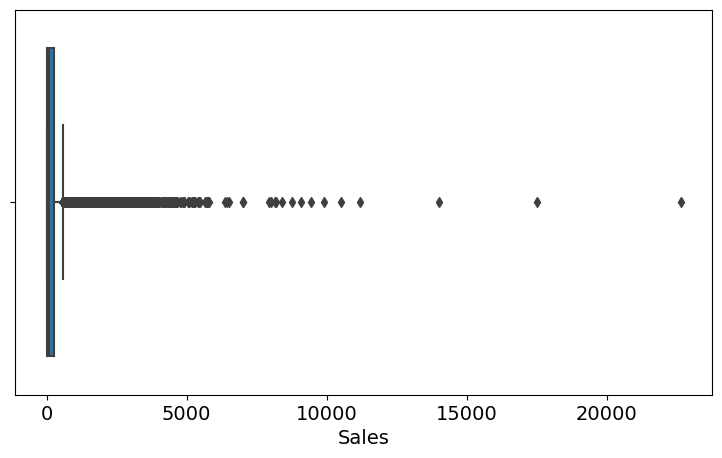

In [14]:
plot_boxplot(df, 'Sales')

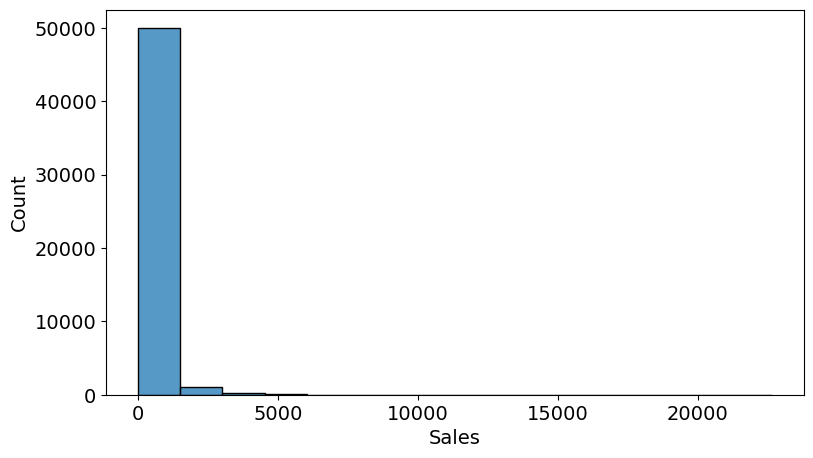

In [15]:
plot_hist(df, 'Sales')

**Method 1 - Interquartile Range (IQR) test**

The interquartile range test is a statistical method used to identify potential outliers in a dataset. It involves calculating the difference between the first quartile (Q1) and the third quartile (Q3) of the data distribution, which represents the middle 50% of the data.

The IQR is then multiplied by a constant factor, typically 1.5, to define the lower and upper limits of the expected range of data values. Data points that fall outside of this expected range are considered potential outliers.


To apply the interquartile test, we first sort the data in ascending order and then calculate the values of Q1 and Q3. These can be calculated as the median of the lower half of the data and the median of the upper half of the data, respectively. The IQR is then calculated as Q3 minus Q1.

The lower limit of the expected range is defined as Q1 minus 1.5 times the IQR, and the upper limit is defined as Q3 plus 1.5 times the IQR. Any data points that fall outside of these limits are considered potential outliers and should be further examined and verified.

One advantage of the interquartile test is that it is less sensitive to extreme values than the next test, the Z-score test, which makes it more suitable for datasets with skewed or non-normal distributions. However, it may not be as effective in detecting outliers in small sample sizes or datasets with multiple modes.



In [16]:
# sort by sales column
df = df.sort_values(by='Sales', ascending=False)

In [17]:
df.Sales

36958    22638.480
16054    17499.950
42123    13999.960
41345    11199.968
38252    10499.970
           ...    
42871        0.876
50507        0.852
42491        0.836
3716         0.556
39113        0.444
Name: Sales, Length: 51290, dtype: float64

In [18]:
# IQR
# creating the series value with the target columns SALES
value = df['Sales']

# first quartile
q1 = value.quantile(.25)

# third quartile
q3 = value.quantile(.75)

# interquartile range
IIQ = q3 - q1

# inferior limit
lower_limit = q1 - 1.5 * IIQ

# upper limit
upper_limit = q3 + 1.5 * IIQ


print(f'''
[Q1] -> {q1}
[Q3] -> {q3}
[IIQ] -> {IIQ:.2f}
[Q1 - 1.5 * IIQ] -> {lower_limit:.2f}
[Q3 + 1.5 * IIQ] -> {upper_limit:.2f}
''')


[Q1] -> 30.758625000000002
[Q3] -> 251.0532
[IIQ] -> 220.29
[Q1 - 1.5 * IIQ] -> -299.68
[Q3 + 1.5 * IIQ] -> 581.50



In [19]:
# applying
selection = (value >= lower_limit) & (value <= upper_limit)
df_igr = df[selection]

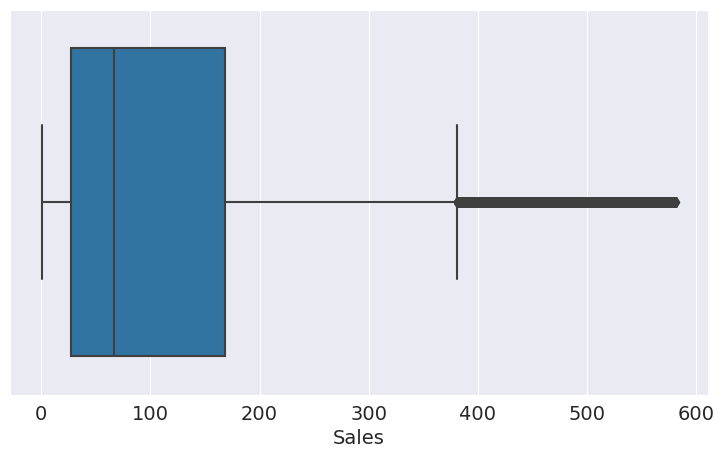

In [20]:
plot_boxplot(df_igr, 'Sales')

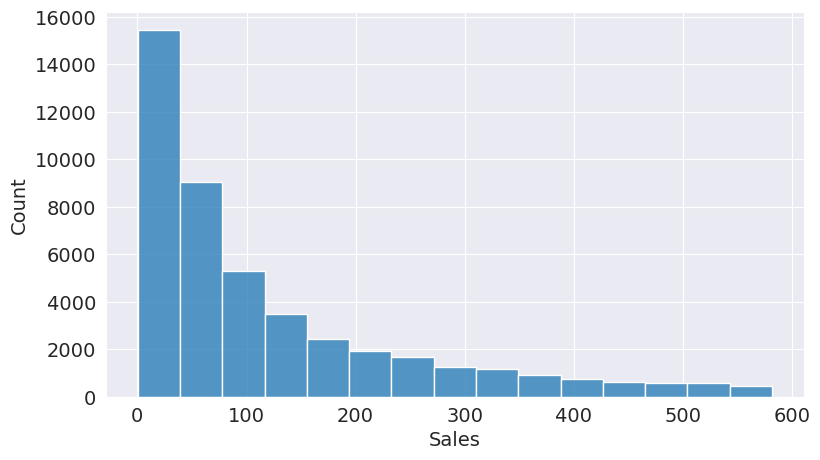

In [21]:
plot_hist(df_igr, 'Sales')

In [22]:
df_igr.describe()

,Order Date,Ship Date,customer ID,Sales,Quantity,Profit
count,45635,45635,45635.00000,45635.000000,45635.000000,45635.000000
mean,2013-05-12 13:16:28.372959232,2013-05-16 12:38:19.393009664,13928.78076,121.659859,3.263789,10.191308
min,2011-01-01 00:00:00,2011-01-03 00:00:00,15.00000,0.444000,1.000000,-1924.542000
25%,2012-06-20 00:00:00,2012-06-24 00:00:00,10932.50000,27.180000,2.000000,-0.013200
50%,2013-07-10 00:00:00,2013-07-14 00:00:00,14530.00000,67.080000,3.000000,7.703100
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,18220.00000,168.600000,4.000000,26.661600
max,2014-12-31 00:00:00,2015-01-07 00:00:00,21925.00000,581.400000,14.000000,284.220000
std,NaN,NaN,5354.85545,131.533247,2.155229,64.842801


**Method 2 - Z-score test**

The **Z-score** test is a commonly used statistical method for identifying outliers in time series data. One approach is to use the normalized data and consider any data points above or below a certain threshold as outliers. Typically, the threshold is set at 3 and -3 standard deviations from the mean, but this can vary depending on the specific case.

**Outlier Sensitivity:** A lower Z-score threshold (e.g., 1.5) will identify more data points as outliers, while a higher threshold (e.g., 3) will be more conservative in identifying outliers. The threshold choice should align with your sensitivity to outliers.

In [23]:
# z-scores for the 'Sales' column
z_scores = np.abs(stats.zscore(df['Sales']))

# define a z-score threshold to identify outliers 
z_score_threshold = 1.5

# new df with outliers removed using the z-score
df_zscore = df[z_scores < z_score_threshold]

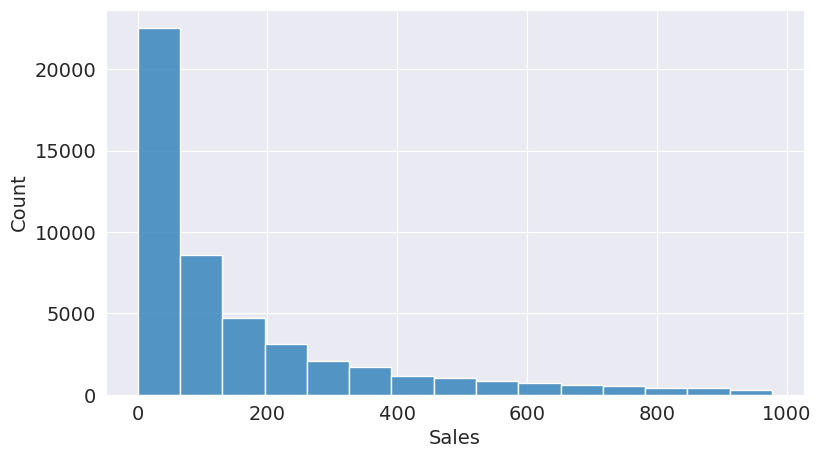

In [24]:
plot_hist(df_zscore, 'Sales')

In [25]:
df_zscore.describe()

,Order Date,Ship Date,customer ID,Sales,Quantity,Profit
count,48573,48573,48573.000000,48573.000000,48573.000000,48573.000000
mean,2013-05-12 01:56:46.559199488,2013-05-16 01:17:17.242912768,13989.954707,159.528417,3.347683,14.644914
min,2011-01-01 00:00:00,2011-01-03 00:00:00,15.000000,0.444000,1.000000,-1924.542000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,11005.000000,29.040000,2.000000,0.000000
50%,2013-07-09 00:00:00,2013-07-13 00:00:00,14590.000000,76.500000,3.000000,8.456400
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,18235.000000,206.844000,4.000000,31.032000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,21925.000000,977.292000,14.000000,486.600000
std,NaN,NaN,5318.737763,198.197705,2.196871,85.707574


**How much of the data we lost after remove outliers?**

In [26]:
def removed_rows(df, df_removed):
    rows_df = int(df.shape[0])
    rows_df_removed = int(df_removed.shape[0])
    rows_removed = rows_df - rows_df_removed
    rows_removed_per = (rows_removed * 100) / rows_df
    return rows_removed, rows_removed_per

In [27]:
# data lost by IGR method
rows_removed_igr, rows_removed_igr_per = removed_rows(df, df_igr)

print(f"The total of rows remove after IGR method is: {rows_removed_igr}")
print(f"{rows_removed_igr_per:.2f}% of the data removed after IGR.")

The total of rows remove after IGR method is: 5655
11.03% of the data removed after IGR.


In [28]:
# data lost by Z-score method
rows_removed_zscore, rows_removed_zscore_per = removed_rows(df, df_zscore)

print(f"The total of rows remove after Z-score method is: {rows_removed_zscore}")
print(f"{rows_removed_zscore_per:.2f}% of the data removed after Z-score.")

The total of rows remove after Z-score method is: 2717
5.30% of the data removed after Z-score.


In [29]:
# data lost by log transformation method
rows_removed_zscore, rows_removed_zscore_per = removed_rows(df, df_zscore)

print(f"The total of rows remove after Z-score method is: {rows_removed_zscore}")
print(f"{rows_removed_zscore_per:.2f}% of the data removed after Z-score.")

The total of rows remove after Z-score method is: 2717
5.30% of the data removed after Z-score.


**The Z-score method was more conservative than the IGR method.**

#### Export DataSets

In [30]:
# df_igr.to_csv('../output/dataset_time_series_igr.csv', index=False) 
# df_zscore.to_csv('../output/dataset_time_series_zscore.csv', index=False) 

## Data Investigation - EDA

#### Collect Large Numbers Describing the Customer Base and E-commerce Segments

In [31]:
df_igr.head()

,Order ID,Order Date,Ship Date,customer ID,Segment,City,State,Region,Country,Market,Product ID,Category,Product Name,Sales,Quantity,Profit
271,RS-2014-7690,2014-01-29,2014-02-01,6315,Consumer,Makhachkala,Dagestan,EMEA,Russia,EMEA,OFF-ELD-10000819,Office Supplies,"Eldon Trays, Industrial",581.400,12,273.2400
35897,IN-2012-32882,2012-08-17,2012-08-22,21325,Consumer,Kanpur,Uttar Pradesh,Central Asia,India,APAC,FUR-FU-10003451,Furniture,"Eldon Frame, Black",581.250,5,46.5000
34105,AG-2011-1390,2011-08-16,2011-08-21,3675,Home Office,Bejaia,Bejaia,Africa,Algeria,Africa,OFF-SAN-10001237,Office Supplies,"SanDisk Cards & Envelopes, Premium",581.040,12,220.6800
29368,MX-2014-137400,2014-09-18,2014-09-18,21805,Corporate,Caucaia,Ceará,South,Brazil,LATAM,TEC-PH-10001548,Technology,"Nokia Speaker Phone, Full Size",580.720,7,40.6000
19431,CA-2014-148404,2014-10-08,2014-10-12,13240,Home Office,Charlotte,North Carolina,South,United States,US,OFF-ST-10003208,Office Supplies,Adjustable Depth Letter/Legal Cart,580.672,4,65.3256


### Specific Requests

**1 - Average Delivery Time in All Countries**

In [32]:
# Calculate 'Delivery Time' as the difference in days using .loc
df_igr.loc[:, 'Delivery Time'] = (df_igr['Ship Date'] - df_igr['Order Date']).dt.days

# Calculate the average delivery time
average_delivery_time = df_igr['Delivery Time'].mean()
print(f'Average Delivery Time in All Countries: {round(average_delivery_time)} days')



Average Delivery Time in All Countries: 4 days


In [33]:
# delivery time per country
average_delivery_time_by_country = df_igr.groupby('Country')['Delivery Time'].mean().reset_index().round()
average_delivery_time_by_country['Delivery Time'].unique()


array([4., 5., 3., 2.])

**2 -  Most Profitable Customer Segment Each Year**


In [34]:
# Extract year from Order Date
df_igr.loc[:, 'Year'] = df_igr['Order Date'].dt.year
most_profitable_segment = df_igr.groupby(['Year', 'Segment'])['Profit'].max().reset_index()

most_profitable_segment

,Year,Segment,Profit
0,2011,Consumer,263.040
1,2011,Corporate,243.300
2,2011,Home Office,274.995
3,2012,Consumer,279.360
4,2012,Corporate,284.220
5,2012,Home Office,274.995
6,2013,Consumer,284.220
7,2013,Corporate,248.040
8,2013,Home Office,270.480
9,2014,Consumer,277.560


**3 - Segment with the Highest Sales Volume**

In [35]:
# barplot function for visualization
def bar_plot(x, y, data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

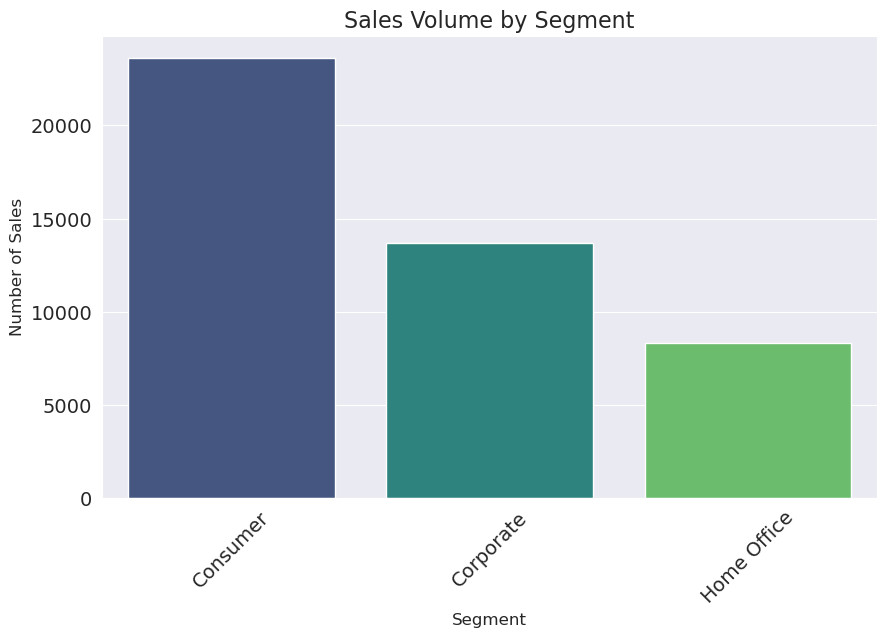

In [36]:
sales_count_by_segment = df_igr.groupby('Segment')['Sales'].count().reset_index()
bar_plot('Segment', 'Sales', sales_count_by_segment, 'Sales Volume by Segment', 'Segment', 'Number of Sales')

**4 - Customer Distribution Across Countries**

In [37]:
customer_by_country = df_igr.groupby('Country')['customer ID'].nunique().reset_index()
customer_by_country = customer_by_country.sort_values(by='customer ID', ascending=False)

In [38]:
customer_by_country.head(20)

,Country,customer ID
139,United States,790
44,France,657
81,Mexico,645
6,Australia,631
47,Germany,559
26,China,510
138,United Kingdom,493
133,Turkey,460
57,India,460
17,Brazil,452


In [39]:
customer_by_country.tail()

,Country,customer ID
118,South Sudan,1
24,Chad,1
9,Bahrain,1
39,Equatorial Guinea,1
40,Eritrea,1


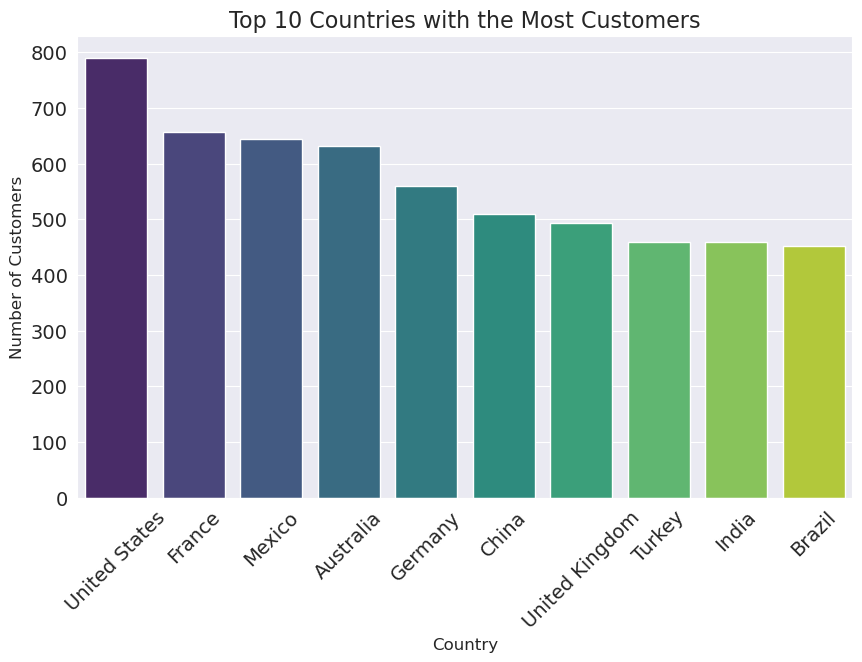

In [40]:
# top 10 countries
top_10_countries = customer_by_country.head(10)

bar_plot(
    x='Country',
    y='customer ID',
    data=top_10_countries,
    title='Top 10 Countries with the Most Customers',
    xlabel='Country',
    ylabel='Number of Customers',
    )


**4.1 - Pareto Chart Customer Distribution Across Countries**

A Pareto Chart, also known as a Pareto Diagram or Pareto Analysis, is a graphical tool used for prioritizing and visualizing the most significant factors in a dataset. It is based on the Pareto Principle, which states that a large majority of problems, effects, or results are often driven by a small number of causes or factors. The Pareto Principle is also known as the "80/20 rule," suggesting that roughly 80% of the effects come from 20% of the causes.

In [41]:
customer_by_country.head()


,Country,customer ID
139,United States,790
44,France,657
81,Mexico,645
6,Australia,631
47,Germany,559


In [42]:
customer_by_country = customer_by_country.head(20)

customer_by_country['cumulative_percentage'] = (customer_by_country['customer ID'].cumsum() / customer_by_country['customer ID'].sum()) * 100
customer_by_country.head(20)


,Country,customer ID,cumulative_percentage
139,United States,790,9.021354
44,France,657,16.523924
81,Mexico,645,23.889460
6,Australia,631,31.095124
47,Germany,559,37.478589
26,China,510,43.302501
138,United Kingdom,493,48.932283
133,Turkey,460,54.185223
57,India,460,59.438164
17,Brazil,452,64.599749


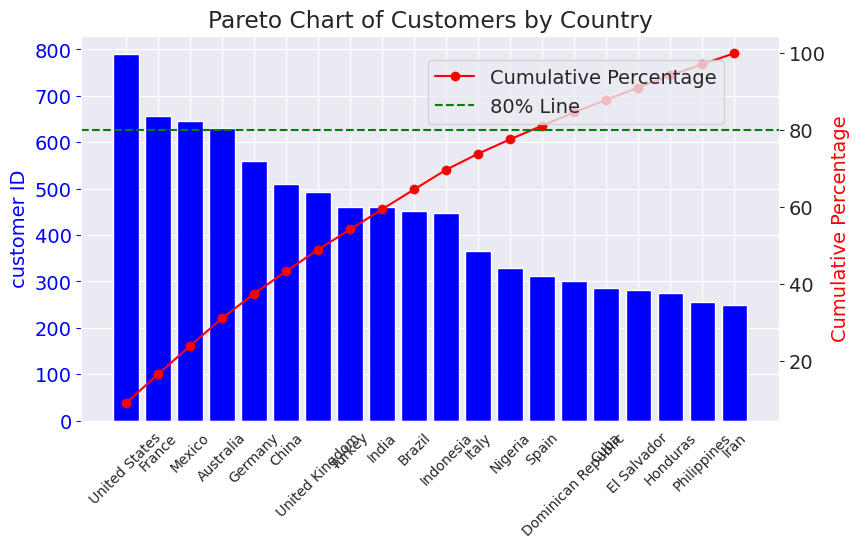

In [43]:

x_values = customer_by_country['Country'].values
y_values = customer_by_country['cumulative_percentage'].values

fig, ax1 = plt.subplots()

# Bar plot for sales by country
ax1.bar(customer_by_country['Country'], customer_by_country['customer ID'], color='b')
ax1.set_ylabel('customer ID', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(x_values, y_values, color='r', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.axhline(y=80, color='g', linestyle='--', label='80% Line')

# Customize the chart
plt.title('Pareto Chart of Customers by Country')
ax1.set_xticklabels(customer_by_country['Country'], rotation=45, fontsize=10)
plt.grid(visible=False)

# Show the legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# Display the chart
plt.show()

In [49]:
customer_by_country.head(20)


,Country,customer ID,cumulative_percentage
139,United States,790,9.021354
44,France,657,16.523924
81,Mexico,645,23.889460
6,Australia,631,31.095124
47,Germany,559,37.478589
26,China,510,43.302501
138,United Kingdom,493,48.932283
133,Turkey,460,54.185223
57,India,460,59.438164
17,Brazil,452,64.599749


**5 - Customer Profile Based on Purchasing Frequency**

In [44]:
df_igr.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'customer ID', 'Segment', 'City',
       'State', 'Region', 'Country', 'Market', 'Product ID', 'Category',
       'Product Name', 'Sales', 'Quantity', 'Profit', 'Delivery Time', 'Year'],
      dtype='object')

In [45]:
# new df group by customer ID
customer_groups = df_igr.groupby('customer ID')

# customer profile using agregate function
customer_profile = customer_groups.agg({
    'Order ID': 'count',       # Number of orders
    'Sales': 'sum',            # Total sales
    'Profit': 'sum',           # Total profit
    'Quantity': 'sum',         # Total quantity purchased
    'Delivery Time': 'mean'    # Average delivery time
})

# rename the columns 
customer_profile = customer_profile.rename(columns={
    'Order ID': 'Frequency',
    'Sales': 'Total Sales',
    'Profit': 'Total Profit',
    'Quantity': 'Total Quantity Purchased',
    'Delivery Time': 'Average Delivery Time'
})

# sort the customer profile by ppurchasing frequency
customer_profile = customer_profile.sort_values(by='Frequency', ascending=False)

# reset the index for a cleaner output
customer_profile.reset_index(inplace=True)

customer_profile

,customer ID,Frequency,Total Sales,Total Profit,Total Quantity Purchased,Average Delivery Time
0,18850,88,11244.6880,1229.6629,298,3.988636
1,20755,82,12105.2005,914.9661,297,4.146341
2,11335,82,10569.6040,2000.7405,319,4.097561
3,15805,78,11352.7397,2240.2536,295,4.102564
4,17965,78,10132.2022,748.7027,267,4.051282
...,...,...,...,...,...,...
1585,7890,1,19.1280,-22.4820,1,0.000000
1586,6270,1,12.8520,-3.2280,1,6.000000
1587,2985,1,81.4320,-78.8880,8,6.000000
1588,7650,1,301.7100,27.1500,1,2.000000


**6 - Are Frequent Customers Contributing More Revenue and Profit?**

In statistics, the Pearson correlation coefficient is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations

In [46]:
correlation_sales = customer_profile['Frequency'].corr(customer_profile['Total Sales'])
correlation_profit = customer_profile['Frequency'].corr(customer_profile['Total Profit'])

# correlation pearson
print(correlation_sales)
print(correlation_profit)

0.9582574053987369
0.5498488060116395


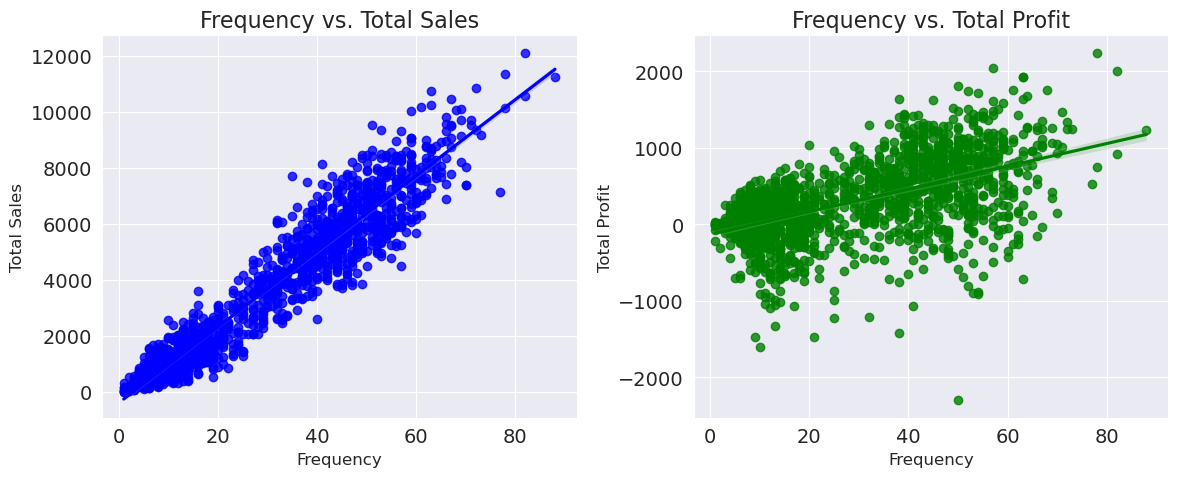

In [47]:
# Create a pair of scatter plots with regression lines
plt.figure(figsize=(12, 5))

# Scatter plot for Frequency vs. Total Sales
plt.subplot(1, 2, 1)
sns.regplot(x='Frequency', y='Total Sales', data=customer_profile, color='blue')
plt.title('Frequency vs. Total Sales', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Scatter plot for Frequency vs. Total Profit
plt.subplot(1, 2, 2)
sns.regplot(x='Frequency', y='Total Profit', data=customer_profile, color='green')
plt.title('Frequency vs. Total Profit', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)

plt.tight_layout()
plt.show()

## Bibliography

-  P. Patil, "What is Exploratory Data Analysis?," Medium, Mar. 2018. [Online]. Available: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15.[Accessed: Octuber 23, 2023].
- D. Andrés, "Clean your Time Series data III: Outliers removal - ML Pills," Apr. 2023. [Online]. Available: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15. [Accessed: Octuber 23, 2023].




 









 